# Codebase For Analysis of Pseudo Gradient Descent
This file shows the basic implementation of the following experiment:
* visualize the pseudo gradient descent of both thinking and nothinking modes
* analysis the role of reflection token and no-thinking token delimiter

In [2]:
import os
import random
random.seed(42)
from datasets import load_dataset
from transformers import AutoTokenizer
from vllm import LLM, SamplingParams

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

/fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 05-25 14:25:09 [__init__.py:256] Automatically detected platform cuda.


2025-05-25 14:25:09,697	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Generate Trajectories Under Thinking/NoThinking Modes

load tokenizer

In [3]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/QwQ-32B")

load AIME24 data

In [4]:
dataset = load_dataset("HuggingFaceH4/aime_2024", split="train")

load model

In [5]:
model = LLM("Qwen/QwQ-32B", tensor_parallel_size=2, gpu_memory_utilization=0.8)

INFO 05-25 14:26:15 [config.py:583] This model supports multiple tasks: {'generate', 'reward', 'classify', 'score', 'embed'}. Defaulting to 'generate'.
INFO 05-25 14:26:15 [config.py:1515] Defaulting to use mp for distributed inference
INFO 05-25 14:26:15 [config.py:1693] Chunked prefill is enabled with max_num_batched_tokens=8192.
[2025-05-25 14:26:17,542] [INFO] [real_accelerator.py:222:get_accelerator] Setting ds_accelerator to cuda (auto detect)


[2025-05-25 14:26:17] INFO spawn.py:60: gcc -pthread -B /fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/include -fPIC -O2 -isystem /fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/include -fPIC -c /tmp/tmprr104zvy/test.c -o /tmp/tmprr104zvy/test.o
[2025-05-25 14:26:17] INFO spawn.py:60: gcc -pthread -B /fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/compiler_compat /tmp/tmprr104zvy/test.o -laio -o /tmp/tmprr104zvy/a.out
/fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
[2025-05-25 14:26:17] INFO spawn.py:60: gcc -pthread -B /fs-computility/llmeval/liujunnan/software/miniconda3/envs/reason-stability/compiler_compat -DNDEBUG -fwrapv -O2 -W

WARNING 05-25 14:26:18 [utils.py:2148] CUDA was previously initialized. We must use the `spawn` multiprocessing start method. Setting VLLM_WORKER_MULTIPROC_METHOD to 'spawn'. See https://docs.vllm.ai/en/latest/getting_started/troubleshooting.html#python-multiprocessing for more information.
INFO 05-25 14:26:23 [__init__.py:256] Automatically detected platform cuda.
[2025-05-25 14:26:24,827] [INFO] [real_accelerator.py:222:get_accelerator] Setting ds_accelerator to cuda (auto detect)
INFO 05-25 14:26:25 [core.py:53] Initializing a V1 LLM engine (v0.8.1) with config: model='Qwen/QwQ-32B', speculative_config=None, tokenizer='Qwen/QwQ-32B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=40960, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=2, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, k

Loading safetensors checkpoint shards:   0% Completed | 0/14 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   7% Completed | 1/14 [00:05<01:06,  5.10s/it]
Loading safetensors checkpoint shards:  14% Completed | 2/14 [00:06<00:37,  3.09s/it]
Loading safetensors checkpoint shards:  21% Completed | 3/14 [00:12<00:47,  4.28s/it]
Loading safetensors checkpoint shards:  29% Completed | 4/14 [00:14<00:35,  3.57s/it]
Loading safetensors checkpoint shards:  36% Completed | 5/14 [00:16<00:25,  2.87s/it]
Loading safetensors checkpoint shards:  43% Completed | 6/14 [00:18<00:19,  2.46s/it]
Loading safetensors checkpoint shards:  50% Completed | 7/14 [00:24<00:24,  3.55s/it]
Loading safetensors checkpoint shards:  57% Completed | 8/14 [00:29<00:25,  4.28s/it]
Loading safetensors checkpoint shards:  64% Completed | 9/14 [00:35<00:23,  4.67s/it]
Loading safetensors checkpoint shards:  71% Completed | 10/14 [00:41<00:19,  4.99s/it]
Loading safetensors checkpoint shards:  79% Completed | 11/14

(VllmWorker rank=0 pid=2951363) INFO 05-25 14:27:28 [loader.py:429] Loading weights took 47.77 seconds
(VllmWorker rank=1 pid=2951420) INFO 05-25 14:27:28 [loader.py:429] Loading weights took 47.25 seconds
(VllmWorker rank=0 pid=2951363) INFO 05-25 14:27:28 [gpu_model_runner.py:1176] Model loading took 30.7117 GB and 49.383828 seconds
(VllmWorker rank=1 pid=2951420) INFO 05-25 14:27:28 [gpu_model_runner.py:1176] Model loading took 30.7117 GB and 49.412442 seconds
(VllmWorker rank=0 pid=2951363) INFO 05-25 14:27:43 [backends.py:409] Using cache directory: /root/.cache/vllm/torch_compile_cache/076e3cb1c8/rank_0_0 for vLLM's torch.compile
(VllmWorker rank=1 pid=2951420) INFO 05-25 14:27:43 [backends.py:409] Using cache directory: /root/.cache/vllm/torch_compile_cache/076e3cb1c8/rank_1_0 for vLLM's torch.compile
(VllmWorker rank=0 pid=2951363) INFO 05-25 14:27:43 [backends.py:419] Dynamo bytecode transform time: 14.84 s
(VllmWorker rank=1 pid=2951420) INFO 05-25 14:27:43 [backends.py:419] 

### Rollout Under Thinking Mode

define verify function

In [6]:
def score(predictions, references):
    try:
        from latex2sympy2_extended import NormalizationConfig
        from math_verify import (ExprExtractionConfig,
                                    LatexExtractionConfig, parse, verify)
    except ImportError:
        raise ImportError('Failed to import required modules. Please '
                            'install the necessary packages: '
                            'pip install math_verify latex2sympy2_extended')

    correct = 0
    count = 0
    details = []
    for i, j in zip(predictions, references):
        count += 1
        j_with_env = f'${j}$'
        gold_parsed = parse(
            j_with_env,
            extraction_mode='first_match',
            extraction_config=[
                LatexExtractionConfig(),
                ExprExtractionConfig(),
            ],
        )

        if len(gold_parsed) != 0:
            # We require the answer to be provided in correct
            # latex (no malformed operators)
            answer_parsed = parse(
                i,
                extraction_config=[
                    LatexExtractionConfig(
                        normalization_config=NormalizationConfig(
                            nits=False,
                            malformed_operators=False,
                            basic_latex=True,
                            equations=True,
                            boxed='all',
                            units=True,
                        ),
                        # Ensures that boxed is tried first
                        boxed_match_priority=0,
                        try_extract_without_anchor=False,
                    )
                ],
                extraction_mode='first_match',
            )

            answer_correct = float(verify(answer_parsed, gold_parsed))
            correct += answer_correct
            detail = {
                'pred': str(answer_parsed),
                'answer': str(gold_parsed),
                'correct': True if answer_correct else False,
            }
            details.append(detail)
    return details


construct prompts

In [7]:
prompt_template = "{question}\n\nPlease reason step by step, and put your final answer within \\boxed{{}}"
inputs = []
answers = []
questions = []
for example in dataset:
    questions.append(example["problem"])
    messages = [
        {"role": "user", "content": prompt_template.format(question=questions[-1])}
    ]
    inputs.append(tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True, enable_thinking=True))
    answers.append(example["answer"])

generate response, only one sample for simple demo

In [8]:
sampling_params = SamplingParams(
    max_tokens=32768,  
    temperature=0.6,  
    top_p=0.95,
    min_p=0.0,
    top_k=40,
    n=16,
    skip_special_tokens=False,
)
outputs = model.generate(inputs[:1], sampling_params, use_tqdm=True)

Processed prompts:   0%|          | 0/16 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Processed prompts: 100%|██████████| 16/16 [02:12<00:00,  8.30s/it, est. speed input: 19.05 toks/s, output: 422.20 toks/s]


parse and evaluate the trajectories

In [9]:
trajectories = []
references = []
for output, answer in zip(outputs, answers[:1]):
    prompt = output.prompt
    for r in output.outputs:
        trajectories.append(r.text)
        references.append(answer)
scores = score(trajectories, references)

[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it handled by the parser now
[2025-05-25 14:37:11] WARNING math_normalization.py:466: equations is deprecated, as it 

compute plausibility of the answer at each position ($\mathcal{\hat{L}}$) of sampled correct reasoning trajectory

In [10]:
messages = [
    {"role": "user", "content": prompt_template.format(question=questions[0])}
]
input_prefix = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
answer_tokens = tokenizer.encode("\n\n**Final Answer**\n\\boxed{" + answers[0], add_special_tokens=False)
prompt2logprobs = {
    "question": questions[0], 
    "answer": answers[0],
    'logprobs': []
}
for trajectory in random.sample([trajectory for trajectory, score in zip(trajectories, scores) if score["correct"]], k=1):
    input_and_response = input_prefix + trajectory
    tokens = tokenizer.encode(input_and_response, add_special_tokens=False)
    think_token_ids = tokenizer.encode("<think>", add_special_tokens=False)

    def find_subsequence(tokens, sub):
        for i in range(len(tokens) - len(sub) + 1):
            if tokens[i:i+len(sub)] == sub:
                return i
        return -1
    think_pos = find_subsequence(tokens, think_token_ids)
    assert think_pos != -1

    prefixes = []
    for end in range(think_pos + 1, len(tokens) + 1):
        prefixes.append(tokens[:end] + answer_tokens)

    sampling_params = SamplingParams(
        temperature=0, prompt_logprobs=1, max_tokens=1
    )
    outputs = model.generate([
        {"prompt_token_ids": prefix} for prefix in prefixes
    ], sampling_params, use_tqdm=True)
    prompt2logprobs["logprobs"].append([])
    for i, (output, prefix) in enumerate(zip(outputs, prefixes)):
        def extract_logprobs(logprobs, tokens):
            probs = []
            for item, tok_id in zip(logprobs, tokens):
                probs.append(item[tok_id].logprob) if item is not None else probs.append(None)
            return probs
        prompt2logprobs["logprobs"][-1].append({
            "prompt_ids": prefix,
            "logprobs": extract_logprobs(output.prompt_logprobs, prefix)
        })

Processed prompts: 100%|██████████| 3588/3588 [19:57<00:00,  3.00it/s, est. speed input: 5877.40 toks/s, output: 3.00 toks/s]


extract $\mathcal{\hat{L}}$

In [12]:
L = {
    "question": prompt2logprobs["question"],
    "answer": prompt2logprobs["answer"],
    "logprobs": []
}
answer_tokens = tokenizer.encode(prompt2logprobs["answer"], add_special_tokens=False)
extended_answer_tokens = tokenizer.encode("\n\n**Final Answer**\n\\boxed{" + prompt2logprobs["answer"], add_special_tokens=False)
for item in prompt2logprobs["logprobs"][0]:
    L["logprobs"].append(-np.mean(item["logprobs"][-len(answer_tokens):]))
L["logprobs"] = L["logprobs"][:-len(extended_answer_tokens)]

draw the curve of $\mathcal{\hat{L}}$

[2025-05-25 15:12:49] INFO _mathtext.py:648: Substituting symbol L from STIXNonUnicode


[2025-05-25 15:12:49] INFO _mathtext.py:648: Substituting symbol L from STIXNonUnicode


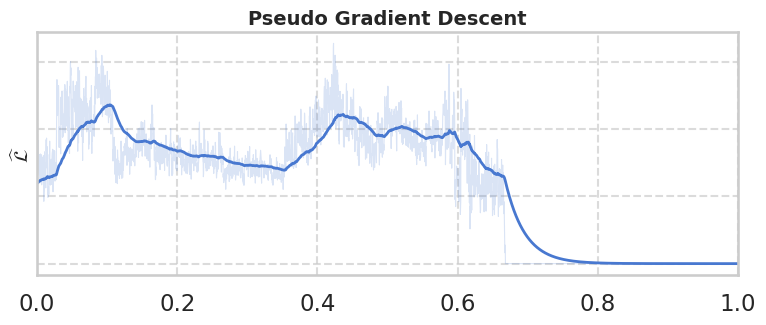

In [31]:
plt.rcParams['font.family'] = 'Maple Mono'
plt.rcParams['font.weight'] = 'normal'

sns.set_theme(style="whitegrid")
sns.set_context("talk")

fig = plt.figure(figsize=(8, 4))

linestyles = ['-', '--', '-.', ':']

legend_handles = []
legend_labels = []

logprobs = L['logprobs']
    
colors = sns.color_palette("muted")
    
raw_data = np.array(logprobs)
raw_data = raw_data[raw_data != 0.0]

indices = np.arange(0, len(raw_data))
normalized_indices = indices / (len(indices) - 1) if len(indices) > 1 else indices

color_idx = random.randint(0, 4)
colors = sns.color_palette("muted")

plt.plot(normalized_indices, raw_data, 
        color=colors[color_idx], 
        alpha=0.2,
        linewidth=0.8)

alpha = 0.01  
smooth_data = np.zeros_like(raw_data)
smooth_data[0] = raw_data[0]

for t in range(1, len(raw_data)):
    smooth_data[t] = alpha * raw_data[t] + (1 - alpha) * smooth_data[t-1]
    
smooth_line = plt.plot(normalized_indices, smooth_data, 
        color=colors[color_idx], 
        linewidth=2)
    
plt.xlabel('') 
plt.title("Pseudo Gradient Descent", fontdict={"size": 14, "weight": "bold"})
plt.grid(True, linestyle='--', alpha=0.7)
    
plt.xlim(0, 1)
    
plt.ylabel('$\mathcal{\widehat{L}}$', fontdict={"size": 14, "weight": "bold"})
plt.tick_params(axis='y', which='both', left=False, labelleft=False)


plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
